In [1]:
from PIL import Image
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import glob
import random
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import joblib
from joblib import dump, load



In [ ]:
# image format changing


# Path to the directory containing the .tit images
input_dir = "E:\SDGP-Group-project\ML_model\preview"

# Path to the directory where you want to save the converted JPEG images
output_dir = "folder/"

# Get a list of all .tit files in the input directory
image_files = [f for f in os.listdir(input_dir)]

# Convert each image to JPEG format
for image_file in image_files:
    with Image.open(os.path.join(input_dir, image_file)) as img:
        # Save the image in JPEG format with the same name but different extension
        img.save(os.path.join(output_dir, os.path.splitext(image_file)[0] + ".jpg"), "JPEG", quality = 100)

print("Conversion complete.")


In [ ]:
# image ganaration using augemtation


# Path to the directory containing the original images
original_dataset_dir = 'E:\SDGP-Group-project\ML_model\perview'

# Path to the directory where you want to save the augmented images
base_dir = 'folder'
os.makedirs(base_dir, exist_ok=True)

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Flow images from the original dataset directory using the data generator
# and save augmented images to the new directory
fnames = ['1 (1).jpeg', '1 (2).jpeg', '1 (3).jpeg', '1 (4).jpeg', '1 (5).jpeg', '1 (6).jpeg', '1 (7).jpeg', '1 (8).jpeg', '1 (9).jpeg', '1 (10).jpeg', '1 (11).jpeg', '1 (12).jpeg', '1 (13).jpeg', '1 (14).jpeg', '1 (15).jpeg', '1 (16).jpeg', '1 (17).jpeg', '1 (18).jpeg', '1 (19).jpeg', '1 (20).jpeg', '1 (21).jpeg']  # List of filenames of images in the original dataset directory
for fname in fnames:
    img = load_img(os.path.join(original_dataset_dir, fname))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=base_dir, save_prefix='au', save_format='jpeg'):
        i += 1
        if i >= 26:  # Generate 20 augmented images from each original image
            break  # Exit the loop to prevent infinite loop


In [ ]:
# image renaming

# Path to the directory containing the images
directory = '9.beech/'

# New base name for the images
new_base_name = 'Beech'

# Iterate over the files and rename them
for i, filename in enumerate(os.listdir(directory), start=1):
    os.rename(os.path.join(directory, filename), os.path.join(directory, f"{new_base_name}.{i:03d}.jpeg"))



In [ ]:



os.chdir('datasets')
if os.path.isdir('train/Beech') is False:
    os.makedirs('train/Alstonia_scholaris')
    os.makedirs('train/Beech')
    os.makedirs('train/Cashew')
    os.makedirs('train/Jackfruit')
    os.makedirs('train/Kashid')
    os.makedirs('train/Mango')
    os.makedirs('train/Nilgiri')
    os.makedirs('train/Pongamia_pinnata')
    os.makedirs('train/Populus_tremula')
    os.makedirs('train/Ulmus_glabra')
    os.makedirs('valid/Alstonia_scholaris')
    os.makedirs('valid/Beech')
    os.makedirs('valid/Cashew')
    os.makedirs('valid/Jackfruit')
    os.makedirs('valid/Kashid')
    os.makedirs('valid/Mango')
    os.makedirs('valid/Nilgiri')
    os.makedirs('valid/Pongamia_pinnata')
    os.makedirs('valid/Populus_tremula')
    os.makedirs('valid/Ulmus_glabra')
    os.makedirs('test/Alstonia_scholaris')
    os.makedirs('test/Beech')
    os.makedirs('test/Cashew')
    os.makedirs('test/Jackfruit')
    os.makedirs('test/Kashid')
    os.makedirs('test/Mango')
    os.makedirs('test/Nilgiri')
    os.makedirs('test/Pongamia_pinnata')
    os.makedirs('test/Populus_tremula')
    os.makedirs('test/Ulmus_glabra')

    for c in random.sample(glob.glob('Alstonia_scholaris*'), 450):
        shutil.move(c, 'train/Alstonia_scholaris')
    for c in random.sample(glob.glob('Beech*'), 450):
        shutil.move(c, 'train/Beech') 
    for c in random.sample(glob.glob('Cashew*'), 450):
        shutil.move(c, 'train/Cashew')
    for c in random.sample(glob.glob('Jackfruit*'), 450):
        shutil.move(c, 'train/Jackfruit')     
    for c in random.sample(glob.glob('Kashid*'), 450):
        shutil.move(c, 'train/Kashid')
    for c in random.sample(glob.glob('Mango*'), 450):
        shutil.move(c, 'train/Mango') 
    for c in random.sample(glob.glob('Nilgiri*'), 450):
        shutil.move(c, 'train/Nilgiri')
    for c in random.sample(glob.glob('Pongamia_pinnata*'), 450):
        shutil.move(c, 'train/Pongamia_pinnata')
    for c in random.sample(glob.glob('Populus_tremula*'), 450):
        shutil.move(c, 'train/Populus_tremula')
    for c in random.sample(glob.glob('Ulmus_glabra*'), 450):
        shutil.move(c, 'train/Ulmus_glabra')

    for c in random.sample(glob.glob('Alstonia_scholaris*'), 100):
        shutil.move(c, 'valid/Alstonia_scholaris')
    for c in random.sample(glob.glob('Beech*'), 100):
        shutil.move(c, 'valid/Beech') 
    for c in random.sample(glob.glob('Cashew*'), 100):
        shutil.move(c, 'valid/Cashew')
    for c in random.sample(glob.glob('Jackfruit*'), 100):
        shutil.move(c, 'valid/Jackfruit')     
    for c in random.sample(glob.glob('Kashid*'), 100):
        shutil.move(c, 'valid/Kashid')
    for c in random.sample(glob.glob('Mango*'), 100):
        shutil.move(c, 'valid/Mango') 
    for c in random.sample(glob.glob('Nilgiri*'), 100):
        shutil.move(c, 'valid/Nilgiri')
    for c in random.sample(glob.glob('Pongamia_pinnata*'), 100):
        shutil.move(c, 'valid/Pongamia_pinnata')
    for c in random.sample(glob.glob('Populus_tremula*'), 100):
        shutil.move(c, 'valid/Populus_tremula')
    for c in random.sample(glob.glob('Ulmus_glabra*'), 100):
        shutil.move(c, 'valid/Ulmus_glabra')  

    for c in random.sample(glob.glob('Alstonia_scholaris*'), 50):
        shutil.move(c, 'test/Alstonia_scholaris')
    for c in random.sample(glob.glob('Beech*'), 50):
        shutil.move(c, 'test/Beech') 
    for c in random.sample(glob.glob('Cashew*'), 50):
        shutil.move(c, 'test/Cashew')
    for c in random.sample(glob.glob('Jackfruit*'), 50):
        shutil.move(c, 'test/Jackfruit')     
    for c in random.sample(glob.glob('Kashid*'), 50):
        shutil.move(c, 'test/Kashid')
    for c in random.sample(glob.glob('Mango*'), 50):
        shutil.move(c, 'test/Mango') 
    for c in random.sample(glob.glob('Nilgiri*'), 50):
        shutil.move(c, 'test/Nilgiri')
    for c in random.sample(glob.glob('Pongamia_pinnata*'), 50):
        shutil.move(c, 'test/Pongamia_pinnata')
    for c in random.sample(glob.glob('Populus_tremula*'), 50):
        shutil.move(c, 'test/Populus_tremula')
    for c in random.sample(glob.glob('Ulmus_glabra*'), 50):
        shutil.move(c, 'test/Ulmus_glabra')  

os.chdir('../')                        

In [13]:


train_path = 'datasets/train'
valid_path = 'datasets/valid'
test_path = 'datasets/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Alstonia_scholaris', 'Beech', 'Cashew', 'Jackfruit', 'Kashid', 'Mango', 'Nilgiri', 'Pongamia_pinnata', 'Populus_tremula', 'Ulmus_glabra'], batch_size=50)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Alstonia_scholaris', 'Beech', 'Cashew', 'Jackfruit', 'Kashid', 'Mango', 'Nilgiri', 'Pongamia_pinnata', 'Populus_tremula', 'Ulmus_glabra'], batch_size=50)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Alstonia_scholaris', 'Beech', 'Cashew', 'Jackfruit', 'Kashid', 'Mango', 'Nilgiri', 'Pongamia_pinnata', 'Populus_tremula', 'Ulmus_glabra'], batch_size=50, shuffle=False)


Found 4500 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [14]:
assert train_batches.n == 4500
assert valid_batches.n == 1000
assert test_batches.n == 500
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

In [15]:
imgs, labels = next(train_batches)

In [23]:


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

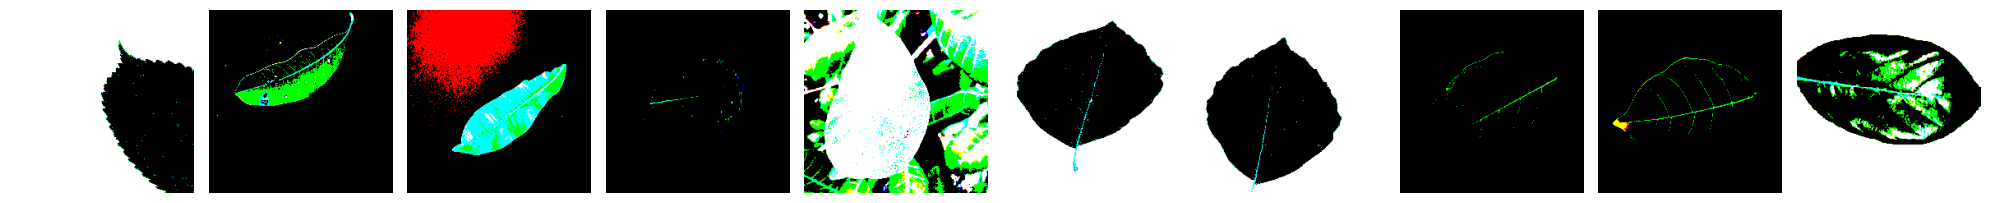

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [24]:
plotImages(imgs)
print(labels)

In [2]:

vgg16_model = tf.keras.applications.vgg16.VGG16()



553467096/553467096 [==============================] - 25s 0us/step


In [3]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
type(vgg16_model)

keras.src.engine.functional.Functional

In [6]:


model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [8]:
for layer in model.layers:
    layer.trainable = False

In [9]:
model.add(Dense(units=10, activation='softmax'))

In [19]:



model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5

90/90 - 922s - loss: 1.1751 - accuracy: 0.6453 - val_loss: 0.4467 - val_accuracy: 0.8840 - 922s/epoch - 10s/step
Epoch 2/5
90/90 - 1038s - loss: 0.3042 - accuracy: 0.9364 - val_loss: 0.2430 - val_accuracy: 0.9430 - 1038s/epoch - 12s/step
Epoch 3/5
90/90 - 755s - loss: 0.1802 - accuracy: 0.9656 - val_loss: 0.1719 - val_accuracy: 0.9660 - 755s/epoch - 8s/step
Epoch 4/5
90/90 - 837s - loss: 0.1299 - accuracy: 0.9751 - val_loss: 0.1347 - val_accuracy: 0.9710 - 837s/epoch - 9s/step
Epoch 5/5
90/90 - 910s - loss: 0.1020 - accuracy: 0.9827 - val_loss: 0.1135 - val_accuracy: 0.9780 - 910s/epoch - 10s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

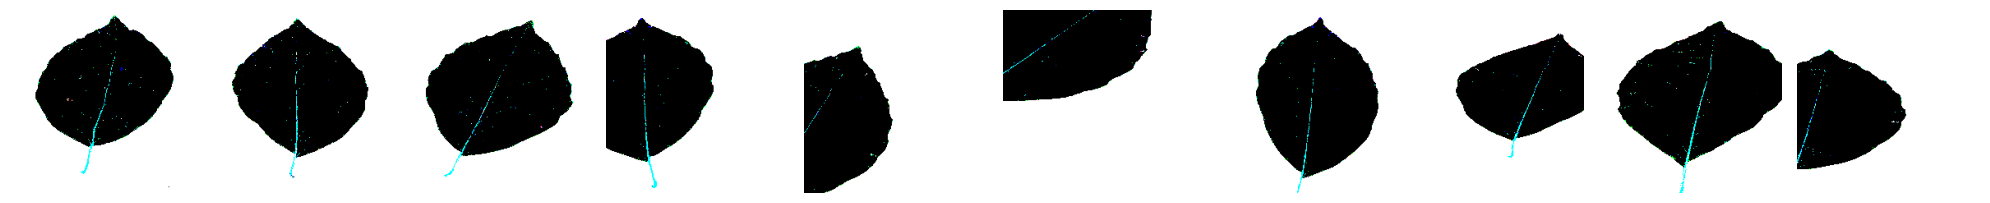

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0.

In [25]:
# %store -r test_batches

test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [26]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [27]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,

In [28]:



np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [29]:


cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [30]:
test_batches.class_indices

{'Alstonia_scholaris': 0,
 'Beech': 1,
 'Cashew': 2,
 'Jackfruit': 3,
 'Kashid': 4,
 'Mango': 5,
 'Nilgiri': 6,
 'Pongamia_pinnata': 7,
 'Populus_tremula': 8,
 'Ulmus_glabra': 9}

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[44  0  0  0  0  3  0  3  0  0]
 [ 0 49  0  0  0  0  0  0  0  1]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0]
 [ 0  0  1  0 47  0  2  0  0  0]
 [ 2  0  0  1  0 46  1  0  0  0]
 [ 0  0  1  0  1  0 48  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  0  0 50]]


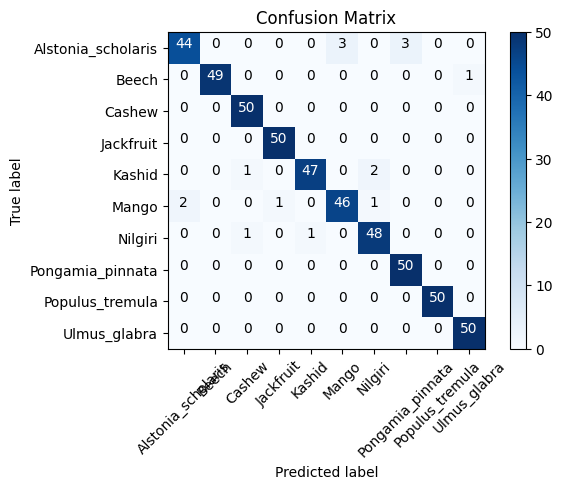

In [33]:


cm_plot_labels = ['Alstonia_scholaris','Beech','Cashew','Jackfruit','Kashid','Mango','Nilgiri','Pongamia_pinnata','Populus_tremula','Ulmus_glabra']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:


# Assuming `model` is your trained ML model
dump(model, 'E:\SDGP-Group-project\ML_model\TraindVGG16Model.joblib')


In [ ]:
model.save('vgg19.h5')  # For Keras model


In [34]:



joblib.dump(model, 'modelVGG16.pkl')

['modelVGG16.pkl']

In [ ]:

model = joblib.load('modelVGG19.pkl')

Input image shape: (1, 224, 224, 3)


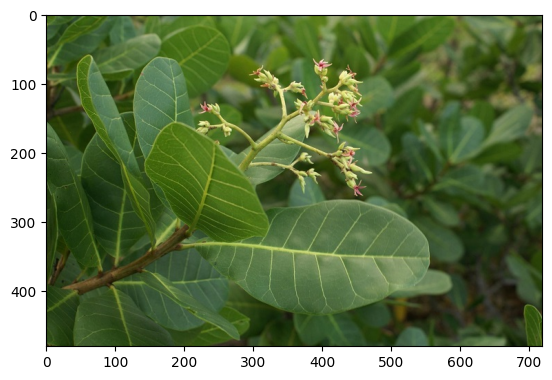

In [36]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from matplotlib.image import imread
from matplotlib.pyplot import imshow
import numpy as np

img_path = 'cashew-leaves.jpg'

# Load and resize the image using cv2
img = load_img(img_path, target_size=(224, 224))

# Display the resized image


# Preprocess the image for the model
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)
my_image = imread(img_path)
imshow(my_image)




In [37]:
print(model.predict(x))

1/1 [==============================] - 10s 10s/step
[[0.00152699 0.00232871 0.76706094 0.09736162 0.05876203 0.03087464
  0.01052579 0.01545963 0.01122812 0.0048716 ]]


In [38]:
# Assuming `model` is your pre-trained model
predictions = model.predict(x)
print(predictions)

# Get the index of the highest probability in the prediction
predicted_class_index = np.argmax(predictions)

# Define your list of class names (replace with your actual class names)
class_names = ['Alstonia_scholaris','Beech','Cashew','Jackfruit','Kashid','Mango','Nilgiri','Pongamia_pinnata','Populus_tremula','Ulmus_glabra']

# Get the class name using the predicted_class_index
predicted_class_name = class_names[predicted_class_index]

print('Predicted class:', predicted_class_name)



1/1 [==============================] - 0s 326ms/step
[[0.00152699 0.00232871 0.76706094 0.09736162 0.05876203 0.03087464
  0.01052579 0.01545963 0.01122812 0.0048716 ]]
Predicted class: Cashew
